#                                               Task-1: Data Exploration and Pre-Processing

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
file_path = r"C:\Users\DELL\OneDrive\Desktop1\Data Science Tasks - Cognifyz\Level-1\Dataset .csv"
data = pd.read_csv(file_path)

In [7]:
# Part 1: Exploring the Dataset
# Identify the number of rows and columns
rows, columns = data.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 9551 rows and 21 columns.


In [8]:
# Part 2: Checking for Missing Values
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
# Handle missing values (if needed, you could drop or fill them with appropriate values)
data = data.fillna('Unknown')  # Replace 'Unknown' with an appropriate placeholder if necessary

In [10]:
# Part 3: Data Type Conversion
# Review data types
print("Data types before conversion:\n", data.dtypes)

Data types before conversion:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [11]:
# Convert 'Votes' to numeric if it is not already
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [12]:
# Convert 'Price range' to integer if it needs conversion
data['Price range'] = data['Price range'].astype(int)

In [13]:
# Check data types after conversion
print("Data types after conversion:\n", data.dtypes)

Data types after conversion:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int32
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


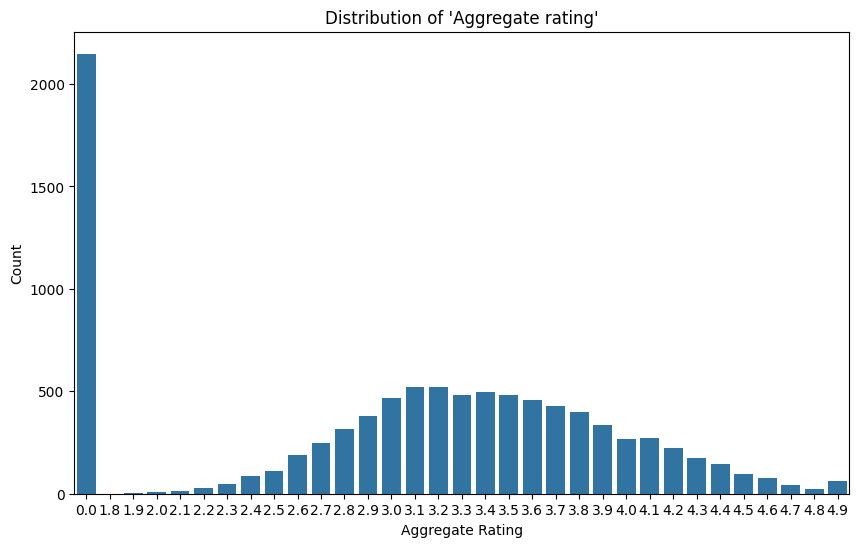

In [14]:
# Plot the distribution of 'Aggregate rating'
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=data)
plt.title("Distribution of 'Aggregate rating'")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

# Task-2: Descriptive Analysis

In [15]:
# Calculate basic statistical measures for numerical columns
numerical_stats = data.describe()

In [16]:
# Explore the distribution of categorical variables
country_code_counts = data['Country Code'].value_counts()
city_counts = data['City'].value_counts()
cuisine_counts = data['Cuisines'].value_counts()

In [17]:
# Identify the top cuisines and cities with the highest number of restaurants
top_cuisines = cuisine_counts.head(10)
top_cities = city_counts.head(10)

In [28]:
# Display numerical statistics and top distributions for categorical variables
print("Basic Statistical Measures for Numerical Columns:\n", numerical_stats)
print("\nDistribution of 'Country Code':\n", country_code_counts.head(10))
print("\nTop 10 Cities with Highest Number of Restaurants:\n", top_cities)
print("\nTop 10 Cuisines with Highest Number of Restaurants:\n", top_cuisines)

Basic Statistical Measures for Numerical Columns:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000

# Task-3: Geospatial Analysis

In [31]:
! pip install folium
! pip install plugins

ERROR: Could not find a version that satisfies the requirement plugins (from versions: none)
ERROR: No matching distribution found for plugins


In [32]:
import folium
from folium.plugins import MarkerCluster

In [33]:
# Part 1: Map Restaurant Locations
# Initialize a folium map centered around a mean location
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)

In [34]:
# Add a marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(restaurant_map)

In [35]:
# Add markers to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']}, Rating: {row['Aggregate rating']}"
    ).add_to(marker_cluster)

In [37]:
# Save the map as an HTML file
map_file = r"C:\Users\DELL\OneDrive\Desktop1\Data Science Tasks - Cognifyz\Level-1\restaurant_locations_map.html"
restaurant_map.save(map_file)

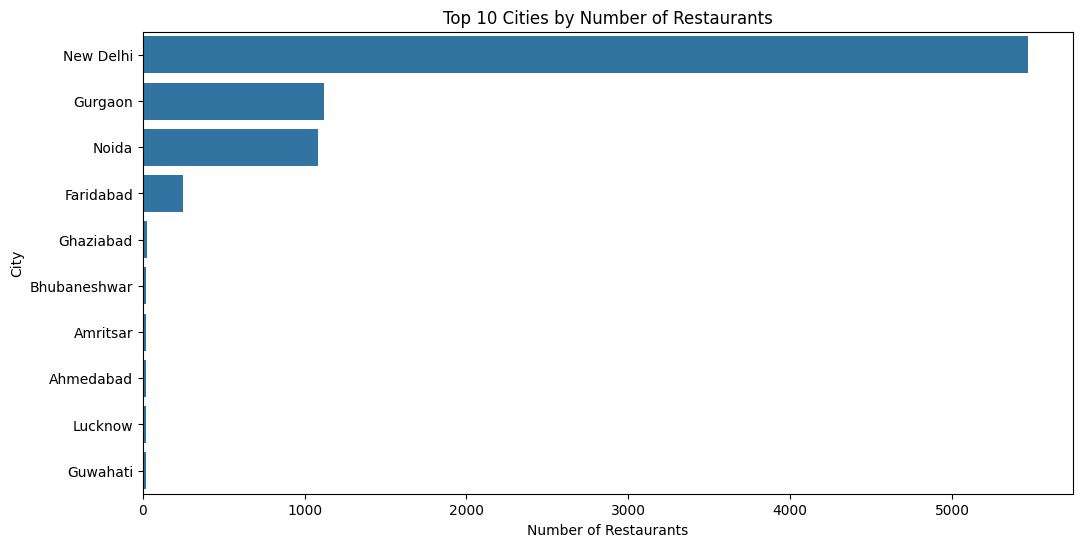

In [38]:
# Part 2: Analyze Distribution of Restaurants by City/Country
# Top 10 cities
top_cities = data['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

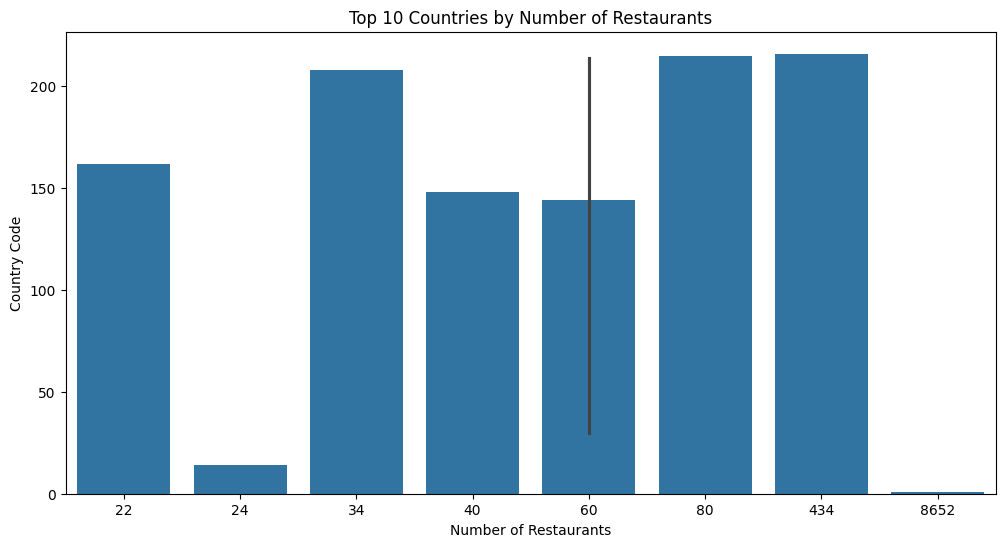

In [39]:
# Top 10 countries by restaurant count
top_countries = data['Country Code'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

In [40]:
# Part 3: Correlation Analysis between Location and Rating
# Check for correlation between latitude, longitude, and rating
location_correlation = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation between location and rating:\n", location_correlation)

Correlation between location and rating:
                   Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


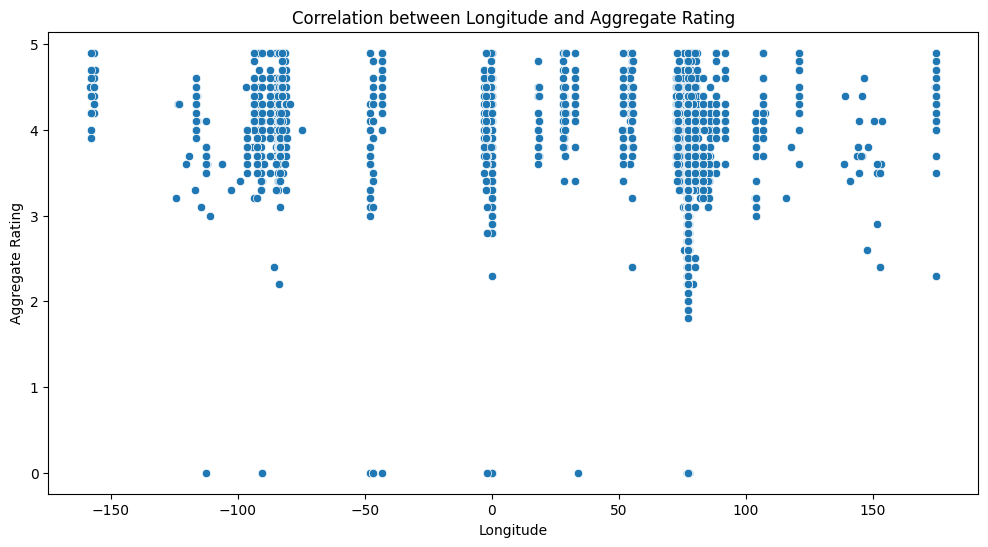

In [41]:
# Scatter plot for visual relationship between Latitude/Longitude and Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Aggregate rating', data=data)
plt.title('Correlation between Longitude and Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.show()

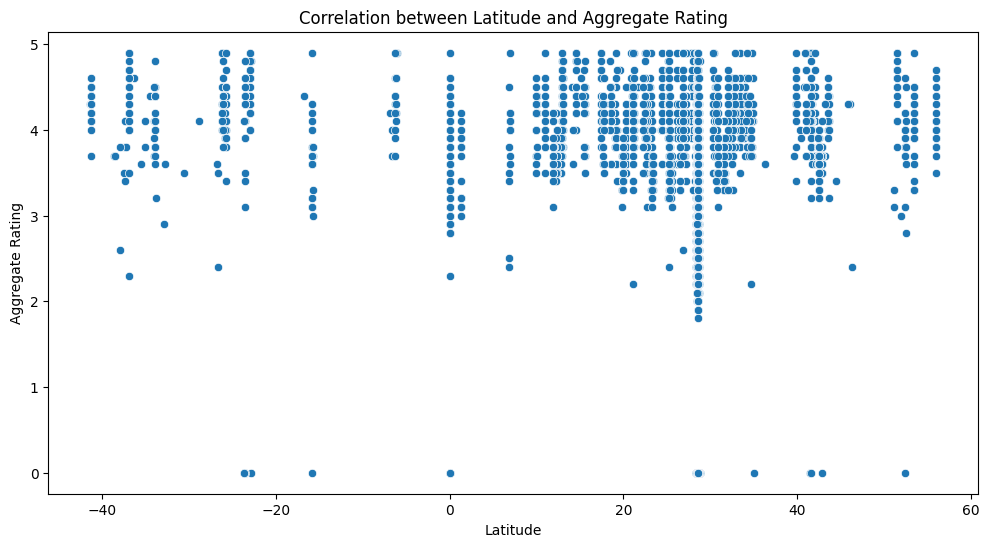

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Latitude', y='Aggregate rating', data=data)
plt.title('Correlation between Latitude and Aggregate Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')
plt.show()